<a href="https://colab.research.google.com/github/CoolWolfy96/MAT421/blob/main/Module_B_Section_17_4%2C_17_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Lagrange Polynomial Interpolation**: The math behind this interpolation may be confusing but it helps to look at the similiar equation y = (x-b)/(a-b). At x = **a**, **y = 1**; at x = **b**, **y = 0**.

If you want to **silence** other x values or make them equal zero, then you can multiply (x-c)/(a-c) to the equation. Once you notice the pattern let xᵢ be the value where you want y = 1 and xⱼ be the values where you want y = 0.

Then you arrive at the Lagrange basis polynomial equation presented in the book. A neat property is that you can multiply a basis by a constant value to match the data. I.e. the basis that equals 1 at x = 1 can be multiplied by 5 so that the basis equals 5 at x = 1 without affecting silenced x values.


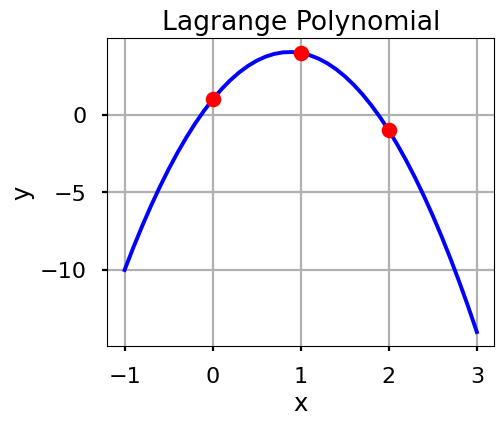

In [19]:
# from textbook
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
x = [0, 1, 2]
y = [1, 4, -1]
x_new = np.arange(-1.0, 3.1, 0.1)
f = lagrange(x, y)
fig = plt.figure(figsize = (5,4))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**Newton's Polynomial Interpolation**: This form of interpolation is better than many of the prior interpolation in a lot of ways.
*   Only **one** equation valid for the data interval
*   Resulting equation is a **polynomial**
*   Can be used to interpolate any order **derivative** of the data points
*   Is continuous and is **easily** and **infinitely** differentiable (though bear in mind meaningful differentiation exist up to the order of the polynomial)

Furthermore, adding more data points is not computationally prohibitive and the polynomial can be recalculated relatively quickly compared to lagrange, granted you store the coefficients.





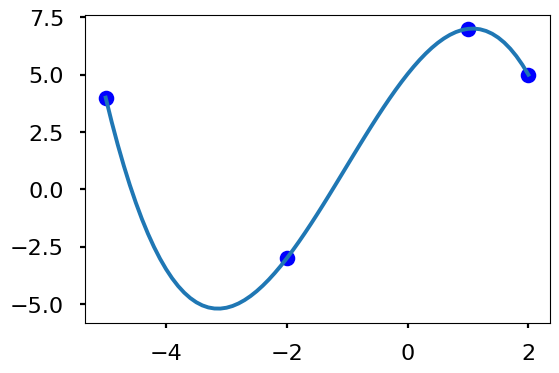

In [18]:
# from textbook

def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y

    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])

    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial
    at x
    '''
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

x = np.array([-5, -2, 1, 2])
y = np.array([4, -3, 7, 5])
# get the divided difference coef
a_s = divided_diff(x, y)[0, :]

# evaluate on new data points
x_new = np.arange(-5, 2.1, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (6, 4))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)